(1, 1, 496) (1, 1, 309)


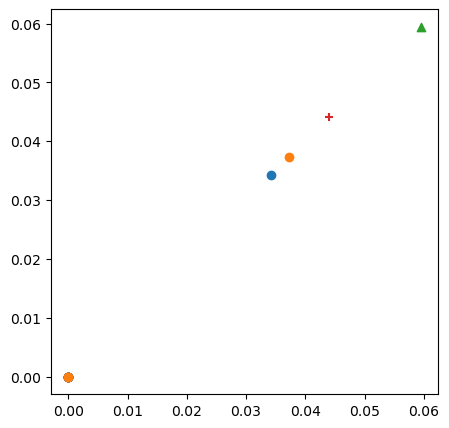

array([0])

In [247]:
import numpy as np
import re
import pandas as pd
import glob
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer

paths = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_ture'
file_list = glob.glob(paths + '/*.txt')

text_list = []

paths_2 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_false'

false_path = glob.glob(paths_2+'/*.txt')

false_list = []

path_3 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_test'

test_path = glob.glob(path_3+'/*.txt')

test_list = []

path_4 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_2'

test_path_2 = glob.glob(path_4+'/*.txt')

test_2_list = []

for file in range(len(file_list)):
    with codecs.open(file_list[file], 'r', encoding = 'utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "", 
                          str(open_text.strip()))
        text_list.append(open_text)
        
for file in range(len(false_path)):
    with codecs.open(false_path[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        false_list.append(open_text)
        
for file in range(len(test_path)):
    with codecs.open(test_path[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_list.append(open_text)
        
        
for file in range(len(test_path_2)):
    with codecs.open(test_path_2[file], 'r', encoding ='utf-8',
                    errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_2_list.append(open_text)

        
# 데이터 전처리

dic_text = {'Text' : [] }
ii = 0

for i in text_list :
    dic_text[ii] = okt.morphs(i)
    ii = ii+1
    
dic_value = {0 : []}    
    
ii = 0    
    
    
tfidf_vectorizer = TfidfVectorizer()


tfidf_vectorizer.fit(text_list)

array_value = []

for i in text_list :
    array_value.append(tfidf_vectorizer.transform([text_list[ii]]).toarray())
    ii = ii+1
    
false_value = []
ii = 0

tfidf_vectorizer.fit(false_list)

for i in false_list :
    false_value.append(tfidf_vectorizer.transform([false_list[ii]]).toarray())
    ii = ii+1
    
    
    
test_value = []

tfidf_vectorizer.fit(test_list)

test_value.append(tfidf_vectorizer.transform(test_list).toarray())

test_value = np.array(test_value)


test_2_value = []

tfidf_vectorizer.fit(test_2_list)

test_2_value.append(tfidf_vectorizer.transform(test_2_list).toarray())
    
import matplotlib.pyplot as plt
import numpy as np

# plt.scatter(array_value[0][:], array_value[0][:])
# plt.scatter(array_value[1][:], array_value[1][:])
# plt.scatter(array_value[2][:], array_value[2][:])
# plt.scatter(array_value[3][:], array_value[3][:])

# plt.scatter(false_value[0][:], false_value[0][:], marker = '^')
# plt.scatter(false_value[1][:], false_value[1][:], marker = '^')
# plt.scatter(false_value[2][:], false_value[2][:], marker = '^')
# plt.show()



    
num = 0

rows = 10
cols = 2

dic_false = [[0 for j in range(cols)] for i in range(rows)]

for i in false_value:
    dic_false[num][0] = i
    dic_false[num][1] = 1
    num = num+1
    

dic_ture = [[0 for j in range(cols)] for i in range(rows)]

num =0

for i in array_value :
    dic_ture[num][0] = i
    dic_ture[num][1] = 0
    num = num+1
    

from sklearn.model_selection import train_test_split

# np.array(dic_false, dtype = 'object')
# np.array(dic_true)



num = 0

false_value = np.array(false_value)
array_value = np.array(array_value)

false_value = np.pad(false_value, pad_width = ((0,0),(0,0),(0,847)), mode = 'constant', constant_values =0)


# test_value = np.pad(test_value, pad_width = ((0,0),(0,0),(0,)), mode = 'constant', constant_values =0)

false_value = false_value.reshape(10, 2853)
array_value = array_value.reshape(10, 2853)


label = [0]*5 + [1]*5

test_2_value = np.array(test_2_value)

print(test_value.shape, test_2_value.shape)


test_value = np.pad(test_value, pad_width = ((0,0),(0,0),(0,2357)), mode = 'constant', constant_values =0)
test_2_value = np.pad(test_2_value, pad_width = ((0,0),(0,0),(0,2544)), mode = 'constant', constant_values =0)


test_value = test_value.reshape(1,2853)
test_2_value = test_2_value.reshape(1,2853)



train_input, test_input, train_label, test_label = train_test_split(array_value + false_value, label,
                                                                   test_size = 0.25, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(train_input, train_label)

plt.scatter(train_input[:,100],train_input[:,100])
plt.scatter(test_input[:,100], test_input[:,100])
plt.scatter(test_value[:,3], test_value[:,3], marker ='^')
plt.scatter(test_2_value[:,3], test_2_value[:,3], marker = '+')


plt.show()


knn.predict(test_2_value)
